#**Hierarchical Clustering Tutorial**
**source**: https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python

In [1]:
# downloading necessary libraries

!pip install scikit-learn
!pip install pandas

!pip install matplotlib seaborn

!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
# import the data
loan_data = pd.read_csv("loan_data.csv")
loan_data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
# summary of columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# checking if missing values are present
percent_missing = round(100*(loan_data.isnull().sum()/len(loan_data)),2)
percent_missing

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [6]:
# remove 'purpose' column since it is text and not necessary
# remove 'not.fully.paid' column since it is the label
cleaned_data = loan_data.drop(['purpose', 'not.fully.paid'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 898.1 KB


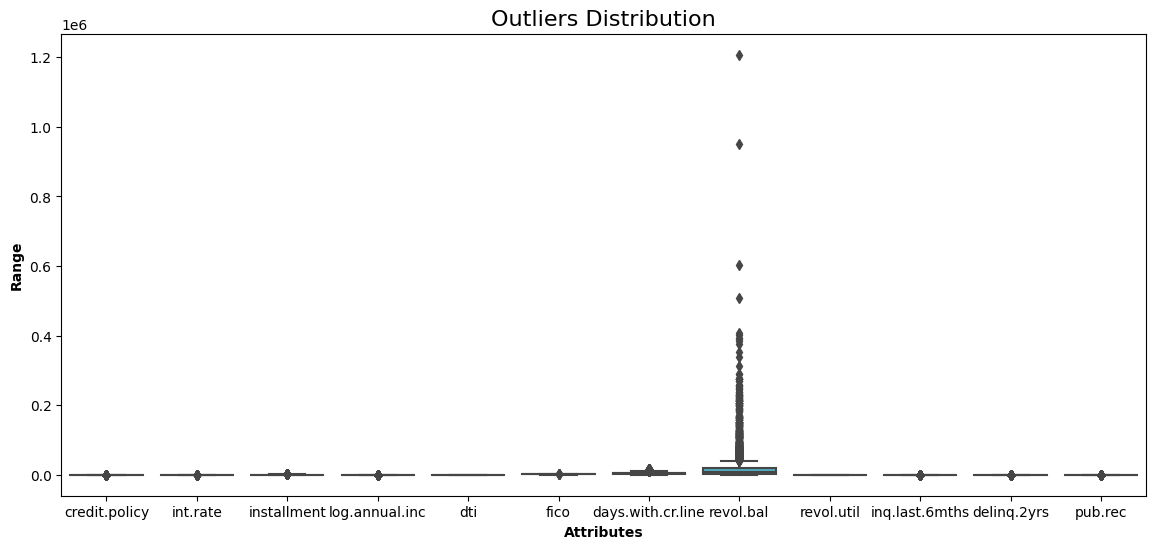

In [8]:
# outlier detection - since hirarchical clustering is sensitive to outliers
def show_boxplot(df):
  plt.rcParams['figure.figsize'] = [14,6]
  sns.boxplot(data = df, orient="v")
  plt.title("Outliers Distribution", fontsize = 16)
  plt.ylabel("Range", fontweight = 'bold')
  plt.xlabel("Attributes", fontweight = 'bold')
   
show_boxplot(cleaned_data)

In [17]:
# remove outliers from the data
def remove_outliers(data):
  
  df = data.copy()

  for col in list(df.columns):

    Q1 = df[str(col)].quantile(0.05)
    Q3 = df[str(col)].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    
  return df

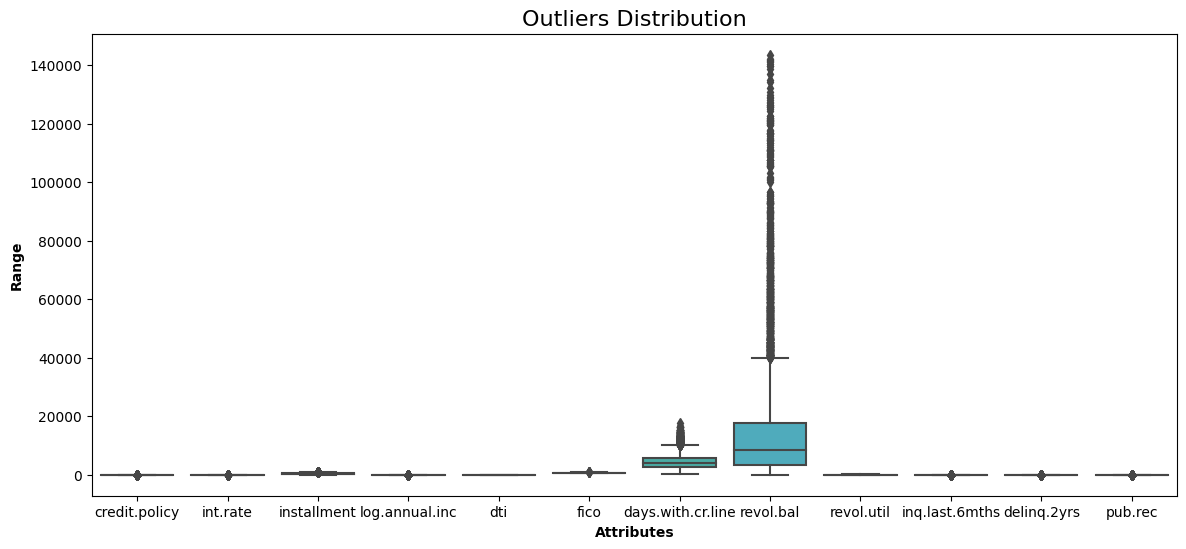

In [18]:
without_outliers = remove_outliers(cleaned_data)
# check box plot without ouliers
show_boxplot(without_outliers)

In [19]:
without_outliers.shape

(9319, 12)

In [21]:
# we would be using euclidean distance for clustering, and this distance is very
# sensitive to variables of different scales

data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(9319, 12)

In [22]:
# applying clustering algorithm using different linkages

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

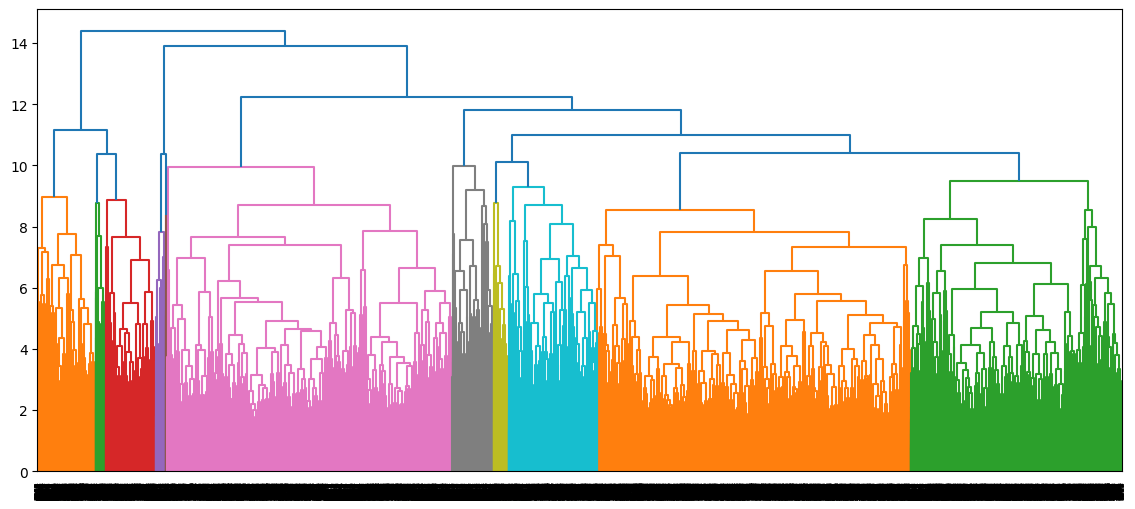

In [23]:
# complete linkage
dendrogram(complete_clustering)
plt.show()

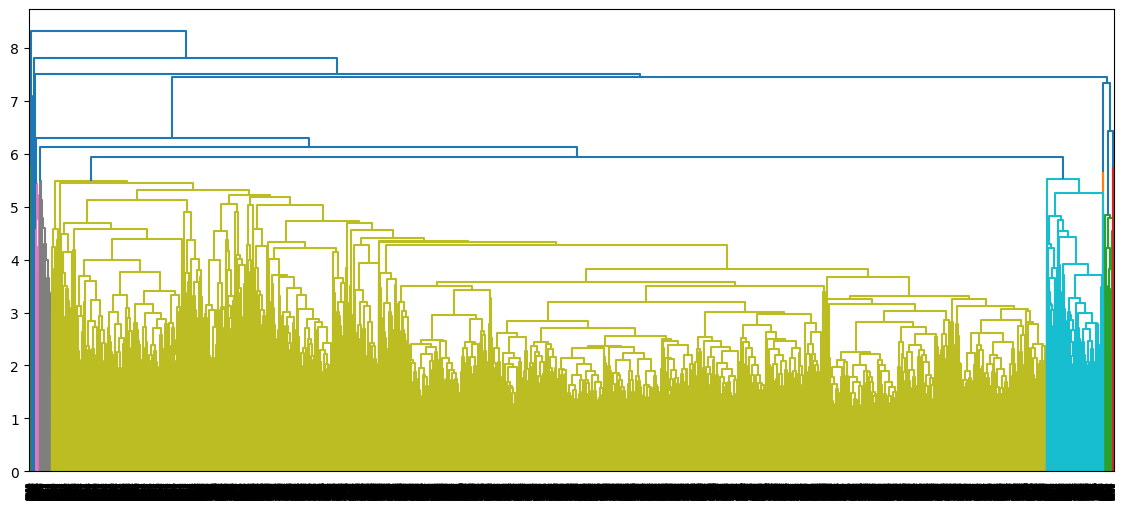

In [24]:
# average linkage

dendrogram(average_clustering)
plt.show()

In [ ]:
# single linkage

# dendrogram(single_clustering)
# plt.show()

###In hierarchical clustering, the right number of clusters can be determined from the dendrogram by identifying the highest distance vertical line which does not have any intersection with other clusters.

<Axes: xlabel='Cluster', ylabel='fico'>

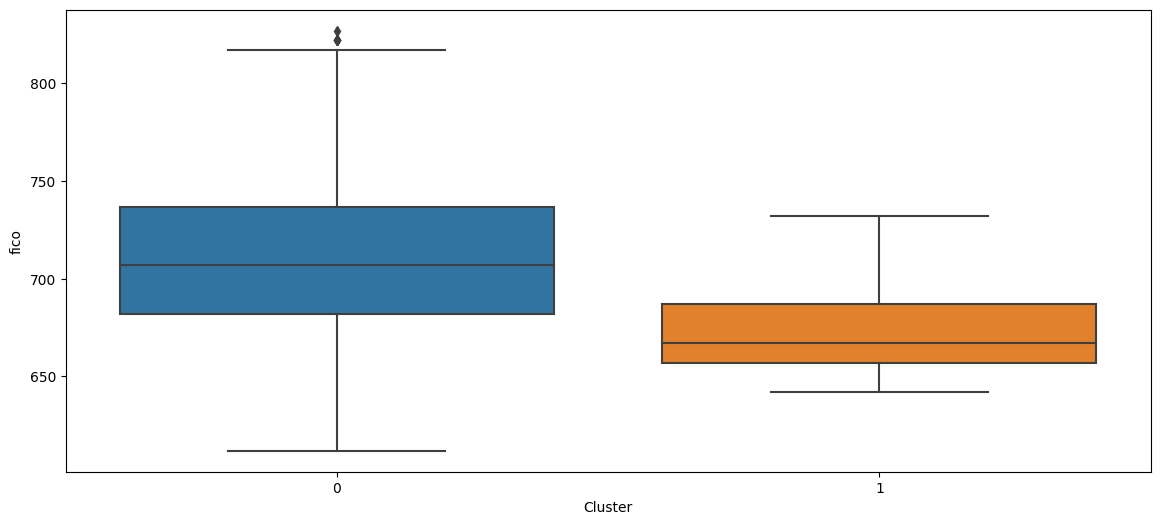

In [29]:
# the reason we have selected average linkage is that our label has two categories 
# 0/1 (not.fully.paid)

cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=without_outliers)

From the above boxplot, we can observe that: 

- Borrowers from cluster 0 have the highest credit scores.  
- Whereas borrowers from cluster 1 have lower credit scores.